In [13]:
import scipy
import scipy.integrate as integrate
import numpy as np
import matplotlib.pyplot as plt

## 1

In [5]:
def road_length(v, t):
    return integrate.trapz(v, t)

Road length is: 68.25


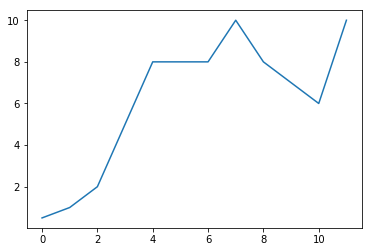

In [17]:
v = np.array([0.5, 1, 2, 5, 8, 8, 8, 10, 8, 7, 6, 10])
t = np.arange(0, 12, 1)

plt.plot(t, v)
print("Road length is: " + str(road_length(v, t)))

Road length is: 24.0


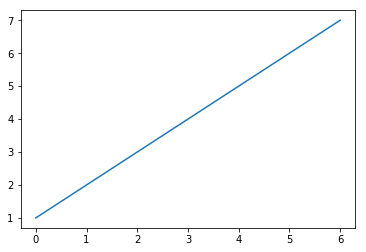

In [19]:
v = np.array([1,2,3,4,5,6,7])
t = np.arange(0, 7, 1)

plt.plot(t, v)
print("Road length is: " + str(road_length(v, t)))

## 2

In [55]:
def simpson(x, y):
    S = 0
    for i in range(1, len(x)-1, 2):
        S += (x[i+1]-x[i])/3*(y[i-1] + 4*y[i] + y[i+1])
    return S

In [59]:
y = np.array([0.5, 1, 2, 5, 8, 8, 8, 10, 8, 7, 6, 10, 12])
x = np.arange(0, 13, 1)
f = np.poly1d(np.polyfit(x, y, 3)) 
print(simpson(x, y), integrate.simps(y,x), integrate.quad(f, x[0], x[-1]))

80.16666666666666 80.16666666666666 (80.76923076923063, 9.011184825265625e-13)


## 3

In [62]:
def f4(y, x):
    return 1/(np.sqrt(x+y)*(1+x+y))

def f5(y, x):
    return x*x+y*y

In [63]:
print(integrate.dblquad(f4, 0, 1, lambda x: 0, lambda x: 1 - x))

(0.4292036732051043, 2.1056482296104932e-08)


In [64]:
print(integrate.dblquad(f5, -3, 3, lambda x: -5, lambda x: 5))

(680.0, 7.549516567451064e-12)


In [80]:
def trap2(f, den=400):
    xs = np.arange(-3,3,1/den)
    ys = np.arange(-5, 5, 1/den)
    vf = np.array([[f5(y, x) for y in ys] for x in xs])
    trap1 = [integrate.trapz(fx, ys) for fx in vf]
    return integrate.trapz(trap1, xs)

In [81]:
print(trap2(f5))

679.1473788752791
